In [1]:
import pandas as pd, numpy as np

In [2]:
data = pd.read_csv("../datasets/Taxi Fares/taxi_fare/train.csv")
data.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748,2.75,1,75.00,24,6.300,105.300,0
1,1187,3.43,1,105.00,24,13.200,142.200,0
2,730,3.12,1,71.25,0,26.625,97.875,1
3,671,5.63,3,90.00,0,9.750,99.750,0
4,329,2.09,1,45.00,12,13.200,70.200,0


In [3]:
data.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  int64  
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  int64  
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 12.8 MB


In [5]:
data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [6]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x13ee523b8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x13ee523bef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13ee523b680>],
 'medians': [<matplotlib.lines.Line2D at 0x13ee52a84d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13ee52a8800>],
 'means': []}

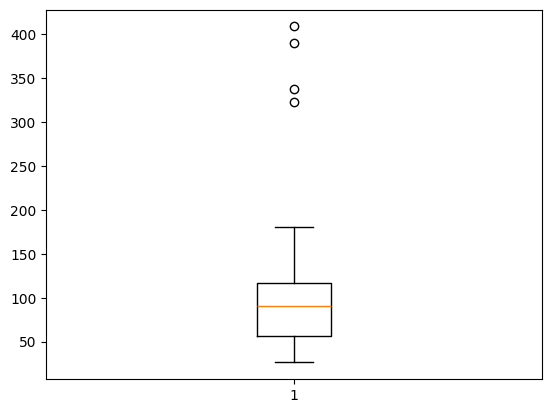

In [7]:
plt.boxplot(data['fare'][:50])

<Axes: >

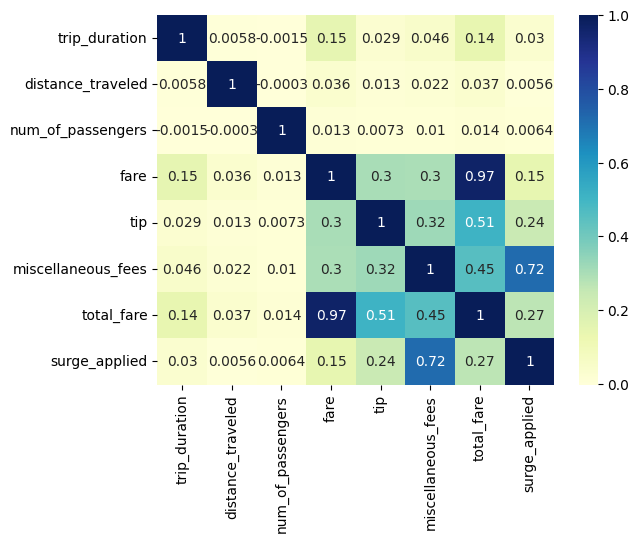

In [8]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', cbar=True)

In [10]:
distributions = ["trip_duration", "distance_traveled", "num_of_passengers", 
                  "total_fare", "surge_applied", "tip", "miscellaneous_fees", "fare"]
dist = data[distributions]

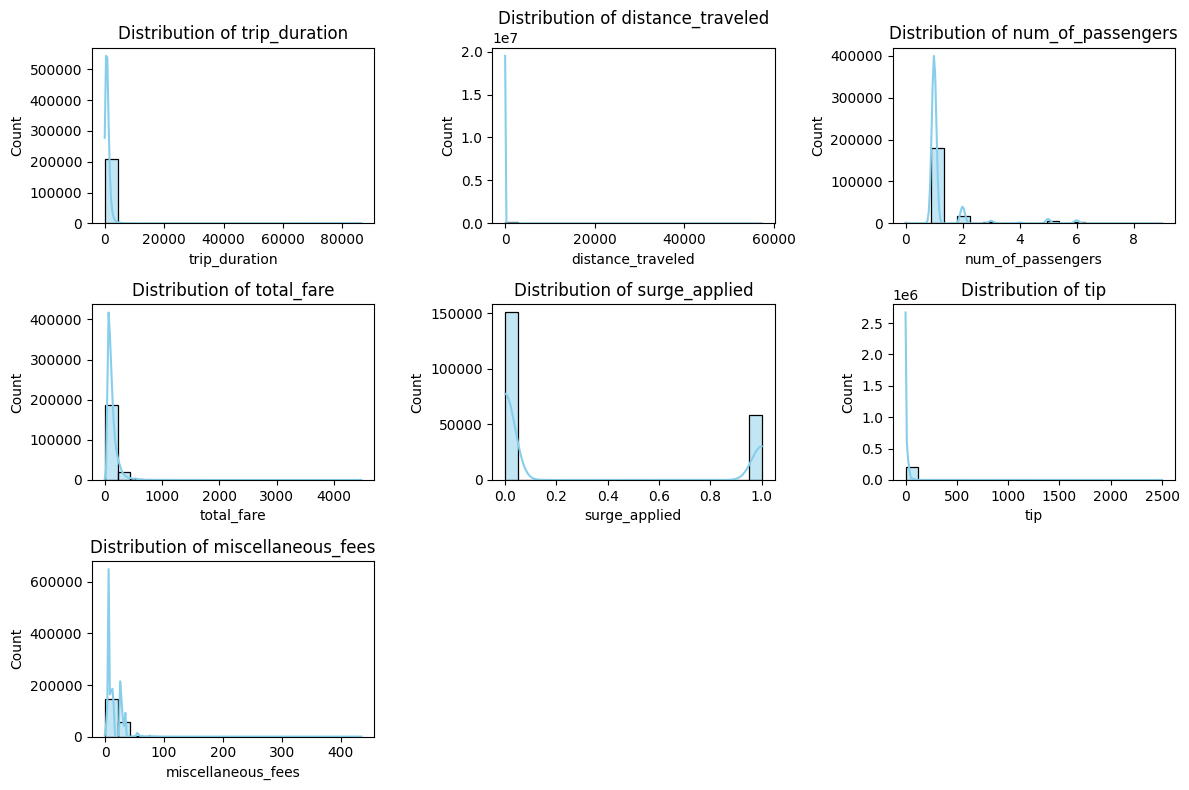

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(distributions[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(dist[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

In [14]:
x = data.drop(columns=['fare'])
y = data['fare']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [15]:
x_train.shape, x_test.shape

((167738, 7), (41935, 7))

In [16]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [17]:
standard_scaler = StandardScaler()
x_train_standard_scaled = standard_scaler.fit_transform(x_train)
x_test_standard_scaled = standard_scaler.transform(x_test)

In [18]:
lr = LinearRegression().fit(x_train_scaled, y_train)

In [19]:
pred = lr.predict(x_test_scaled)

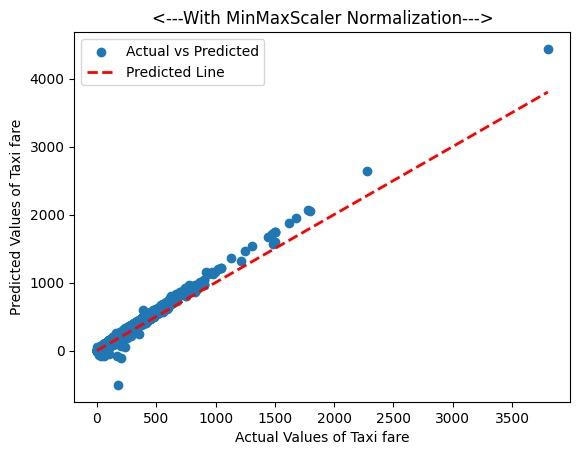

In [21]:
plt.scatter(y_test, pred, label = 'Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values of Taxi fare")
plt.ylabel("Predicted Values of Taxi fare")
plt.title("<---With MinMaxScaler Normalization--->")
plt.legend()
plt.show()

In [22]:
r2_score(y_test, pred)

0.9193261576760645

In [23]:
mae=mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 18.06
Mean Squared Error (MSE): 555.87
Root Mean Squared Error (RMSE): 23.58
R-squared (R2): 0.92


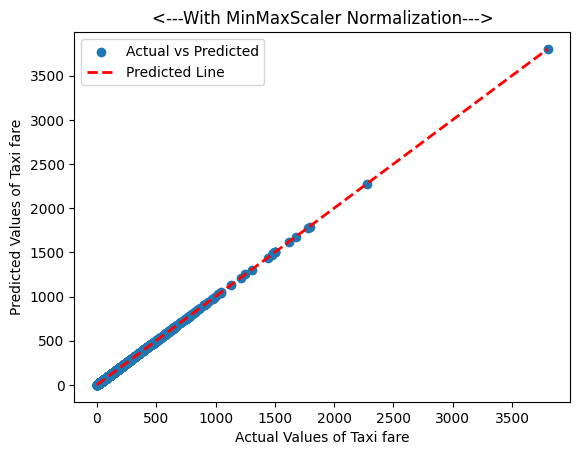

In [25]:
lr = LinearRegression().fit(x_train_standard_scaled, y_train)
pred = lr.predict(x_test_standard_scaled)
plt.scatter(y_test, pred, label = 'Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Predicted Line')
plt.xlabel("Actual Values of Taxi fare")
plt.ylabel("Predicted Values of Taxi fare")
plt.title("<---With MinMaxScaler Normalization--->")
plt.legend()
plt.show()

In [26]:
mae=mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00
